In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from persim import plot_diagrams

In [3]:
PASSBANDS = {"u":0, "g":1, "r":2, "i":3, "z":4, "y":5}

def get_lcs(raw_df: pd.DataFrame, passband: str) -> list[dict, dict]:

    passband_df = raw_df[raw_df['passband']==PASSBANDS[passband]]
    lcs = {}
    mjds = {}
    
    unique_objid = np.unique(passband_df['object_id'])
    
    for object_id in unique_objid:
        
        id_mask = object_id == passband_df['object_id']

        lcs[f"{object_id}"] = passband_df.loc[id_mask, "flux"].to_numpy()
        
        mjds[f"{object_id}"] = passband_df.loc[id_mask, "mjd"].to_numpy()

    return lcs, mjds


In [4]:
# Load data
data_directory = "/home/edgar/astropology/data/"
band = "u_band"

b_dist = np.load(
    f"{data_directory}/bottleneck_"
    f"series_7848_norm_mean_{band}_keep_negative.npy",
    mmap_mode="r"
)
w_dist = np.load(
    f"{data_directory}/wasserstein_"
    f"series_7848_norm_mean_{band}_keep_negative.npy",
    mmap_mode="r"
)

# load map from idx to objectid
idx_id_b_dist = np.load(
    f"{data_directory}/objid_bottleneck_"
    f"series_7848_norm_mean_{band}_keep_negative.npy",
    mmap_mode="r",
    
).astype(int)

idx_id_w_dist = np.load(
    f"{data_directory}/objid_wasserstein_"
    f"series_7848_norm_mean_{band}_keep_negative.npy",
    mmap_mode="r"
).astype(int)

n_series = w_dist.shape[0]

In [5]:
lcs = pd.read_csv(
    f"{data_directory}/plasticc_train_lightcurves.csv.gz",
)
meta_data = pd.read_csv(
    f"{data_directory}/plasticc_train_metadata.csv.gz",
    index_col="object_id"
)

# Explore distribution of mean distance

In [6]:
b_score = np.nanmean(b_dist, axis=1)
b_score *= 1/np.nanmax(b_score)

w_score = np.nanmean(w_dist, axis=1)
w_score *= 1/np.nanmax(w_score)

In [7]:
quantiles = [0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99]

Wasserstein distance

In [8]:
q_w_score = np.quantile(w_score, q=quantiles)

for idx, q in enumerate(quantiles):

    print(f"wdist: {int(q*100)}% -> {q_w_score[idx]:.4E}")


wdist: 25% -> 1.5434E-01
wdist: 50% -> 1.6327E-01
wdist: 75% -> 2.1280E-01
wdist: 80% -> 2.6003E-01
wdist: 90% -> 4.5728E-01
wdist: 95% -> 5.1560E-01
wdist: 99% -> 6.1894E-01


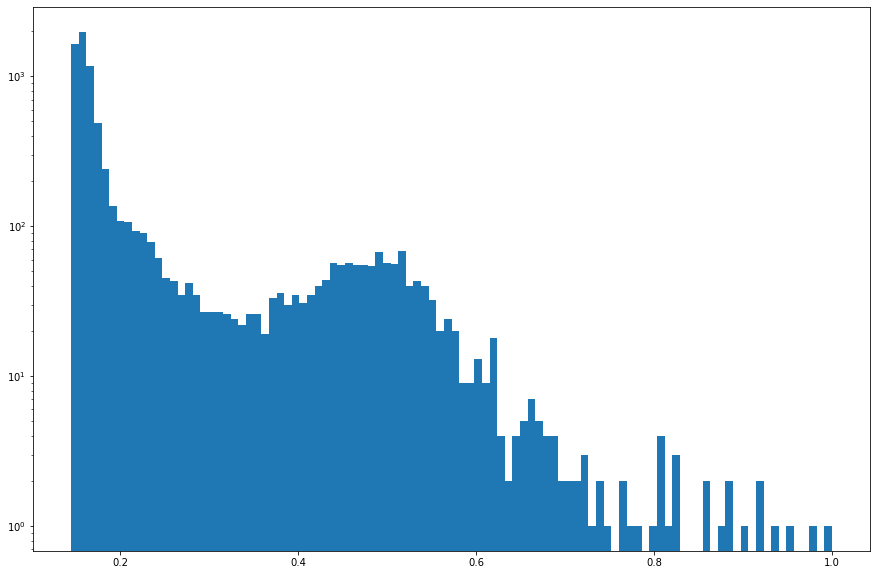

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

max = 1E-0
_ = ax.hist(
    w_score, bins=100, range=(np.nanmin(w_score), max)
)

# ax.set_xscale("log")
ax.ticklabel_format(axis="x", style="sci", scilimits=(-4, 0))
ax.set_yscale("log")

Bottleneck distance

In [10]:
q_b_score = np.quantile(b_score, q=quantiles)

for idx, q in enumerate(quantiles):

    print(f"bdist: {int(q*100)}% -> {q_b_score[idx]:.4e}")

bdist: 25% -> 6.1794e-02
bdist: 50% -> 6.5416e-02
bdist: 75% -> 7.6579e-02
bdist: 80% -> 8.1454e-02
bdist: 90% -> 1.0859e-01
bdist: 95% -> 1.5249e-01
bdist: 99% -> 3.3892e-01


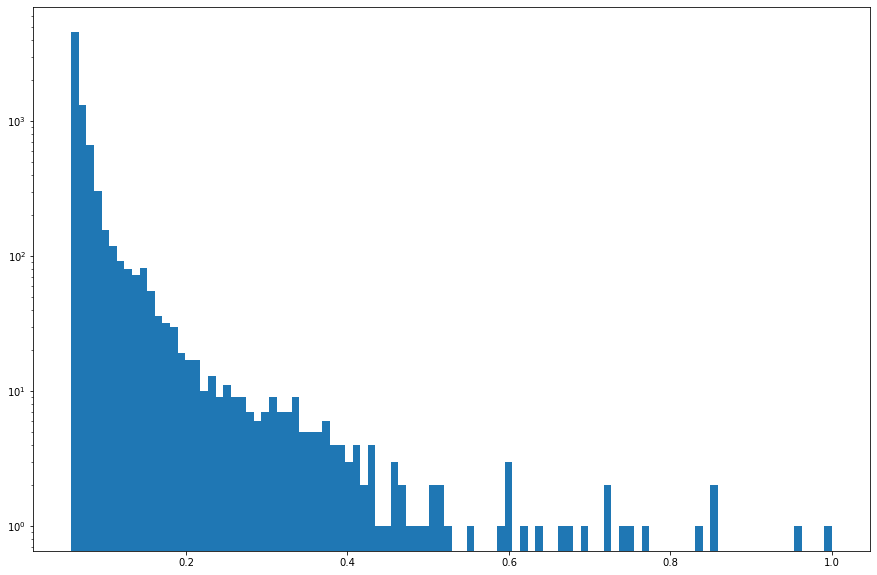

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))

max = 1E-0
_ = ax.hist(
    b_score, bins=100, range=(np.nanmin(b_score), max)
)

# ax.set_xscale("log")
ax.ticklabel_format(axis="x", style="sci", scilimits=(-4, 0))
ax.set_yscale("log")

# Explore anomalies and compare

In [12]:
u_lcs, u_mjds = get_lcs(raw_df=lcs, passband="u")
# plt.scatter(u_mjds["615"], u_lcs["615"])

In [13]:
rank_w = np.argsort(w_score)
rank_b = np.argsort(b_score)

Wasserstein vs Bottleneck

In [14]:
def rank_to_object_id(rank, score, idx_objid):

    score_arg_sort = np.argsort(score)
    
    idx_lc = score_arg_sort[rank]

    id_mask = idx_objid[:, 0] == idx_lc

    object_id = idx_objid[id_mask, 1][0]

    return object_id

In [18]:
for rank in range(50, 100):

    object_id = rank_to_object_id(-rank, w_score, idx_id_w_dist)
    # lc = u_lcs[f"{object_id}"]
    # mjd = u_mjds[f"{object_id}"]
    # plt.clf()
    # plt.scatter(mjd, lc)
    # plt.show()

    # print(np.nanmean(lc))
    print(meta_data.loc[object_id, ["target", "true_target"]])

target         65.0
true_target    65.0
Name: 36362, dtype: float64
target         65.0
true_target    65.0
Name: 1227, dtype: float64
target         65.0
true_target    65.0
Name: 293898, dtype: float64
target         92.0
true_target    92.0
Name: 89709, dtype: float64
target         65.0
true_target    65.0
Name: 6266, dtype: float64
target         92.0
true_target    92.0
Name: 117461, dtype: float64
target         65.0
true_target    65.0
Name: 281056, dtype: float64
target         16.0
true_target    16.0
Name: 312681, dtype: float64
target         65.0
true_target    65.0
Name: 152787, dtype: float64
target         65.0
true_target    65.0
Name: 212084, dtype: float64
target         92.0
true_target    92.0
Name: 61407, dtype: float64
target         65.0
true_target    65.0
Name: 280954, dtype: float64
target         92.0
true_target    92.0
Name: 313565, dtype: float64
target         65.0
true_target    65.0
Name: 57784, dtype: float64
target         65.0
true_target    65.0
Na

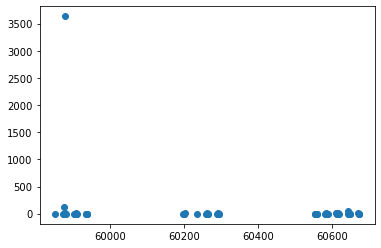

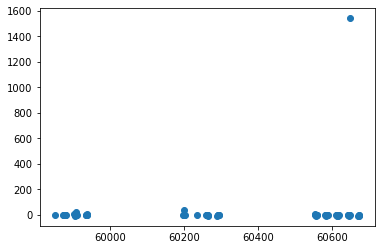

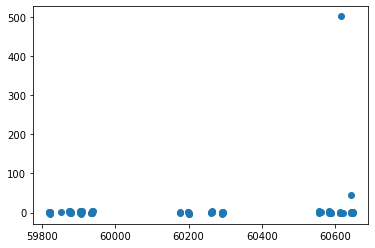

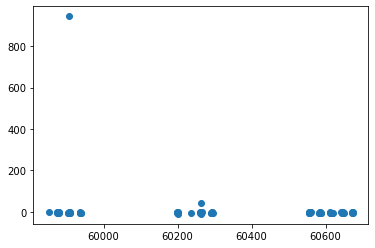

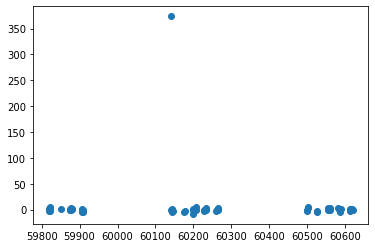

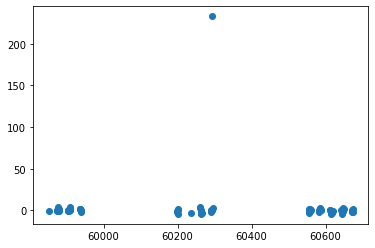

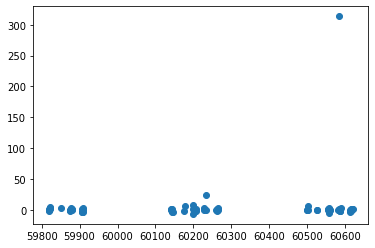

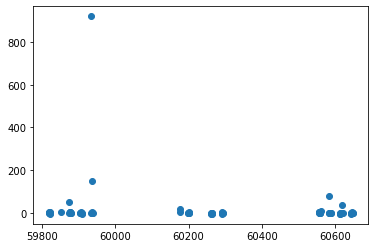

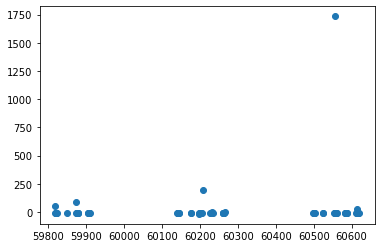

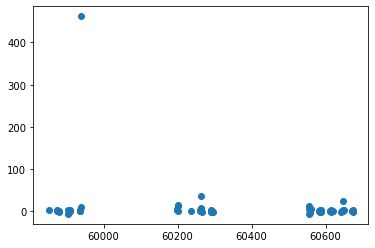

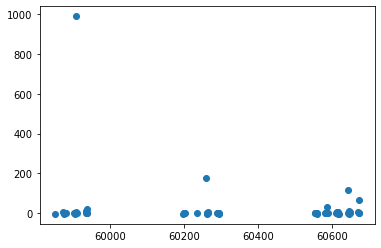

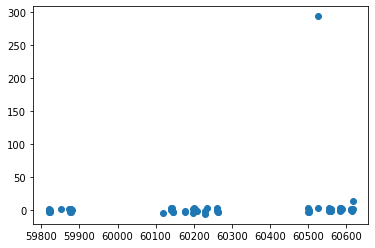

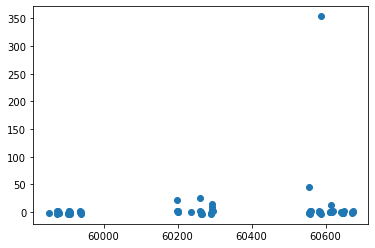

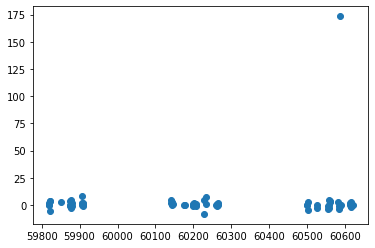

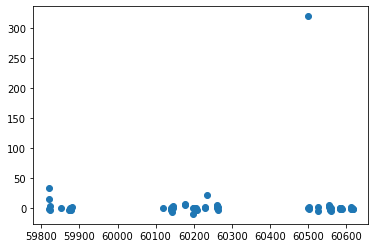

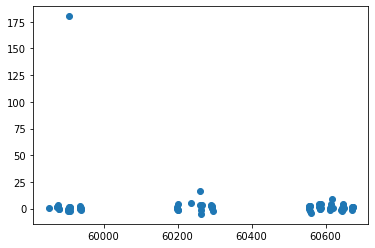

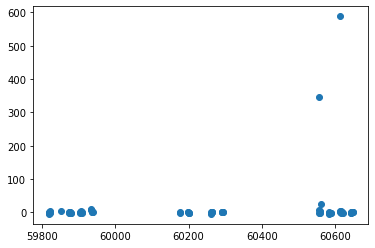

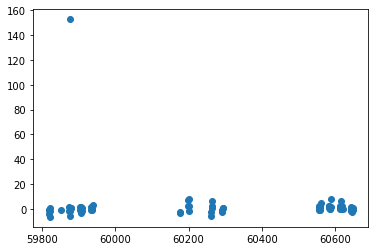

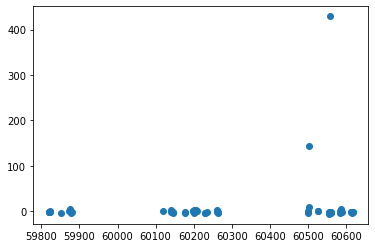

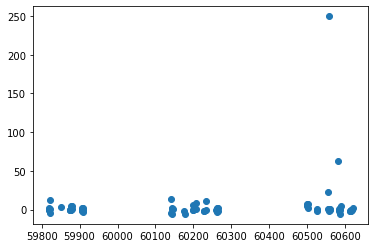

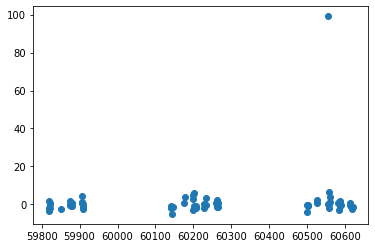

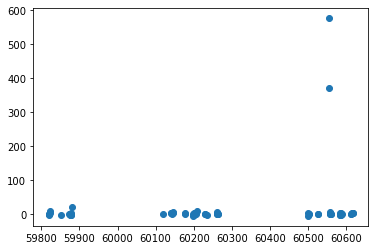

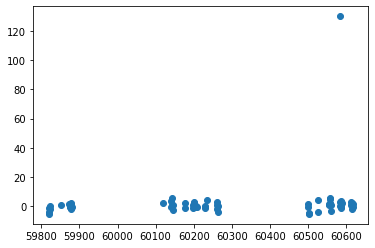

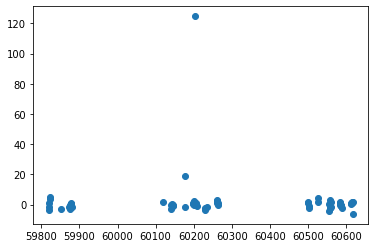

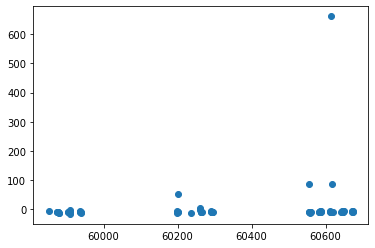

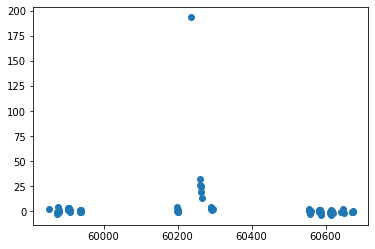

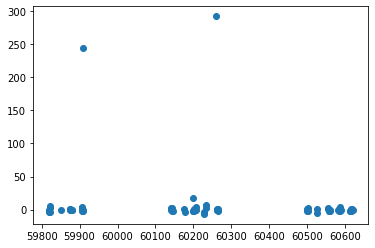

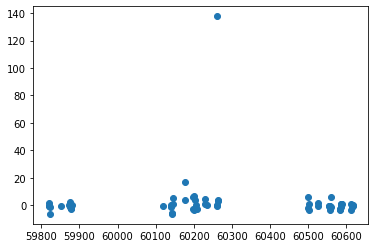

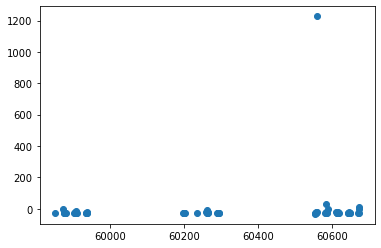

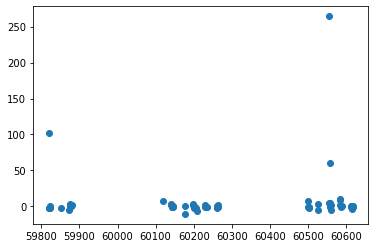

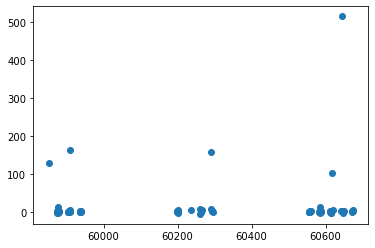

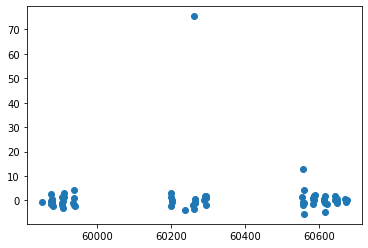

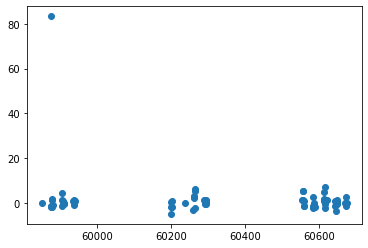

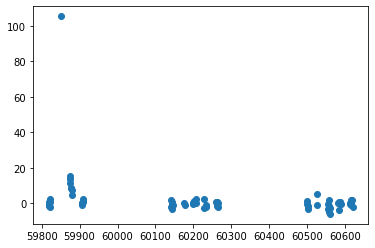

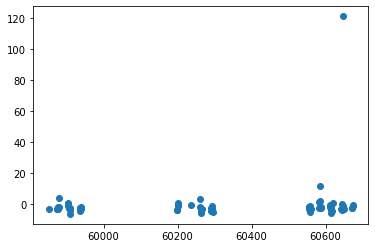

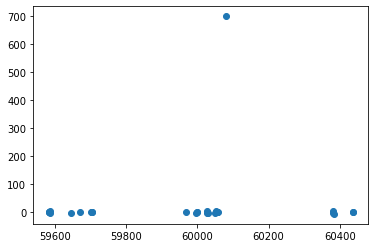

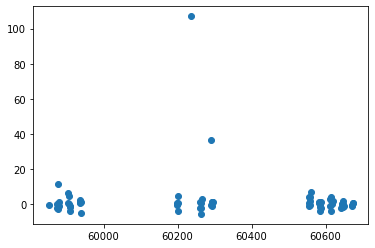

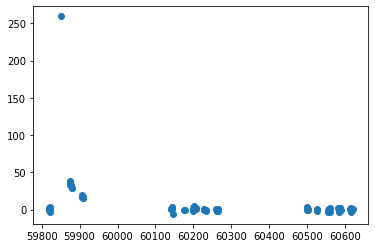

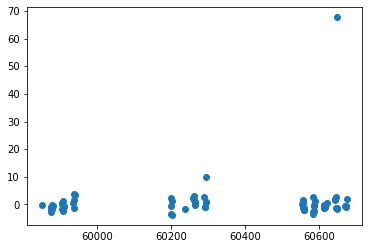

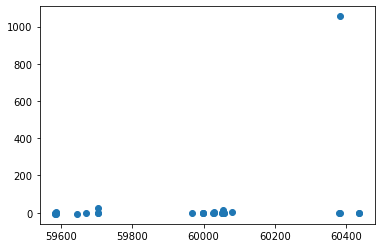

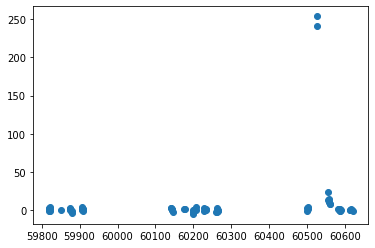

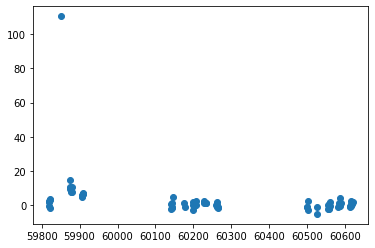

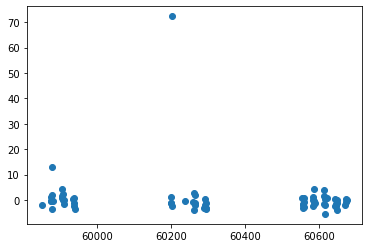

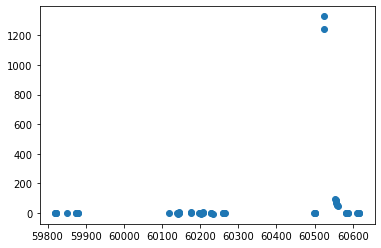

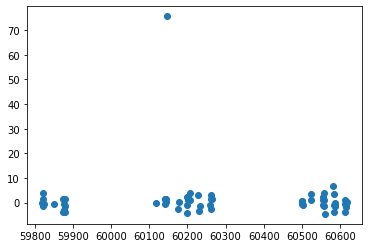

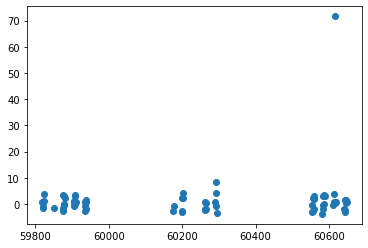

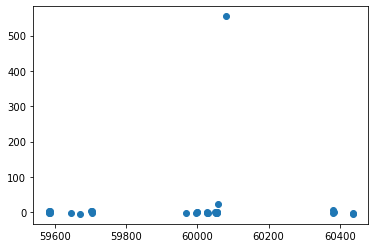

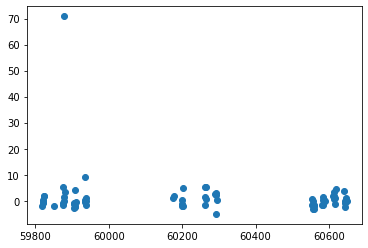

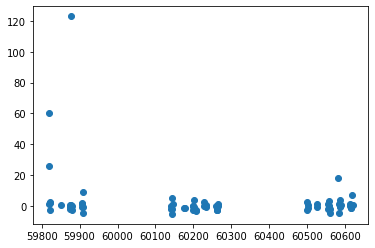

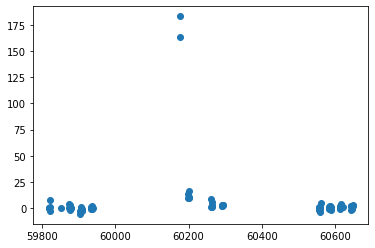

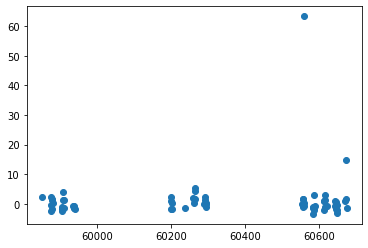

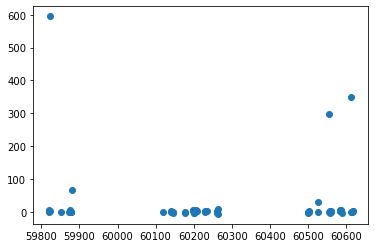

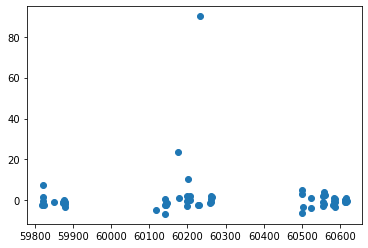

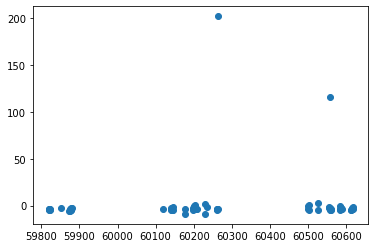

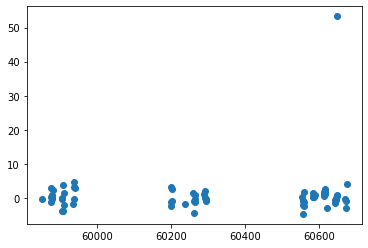

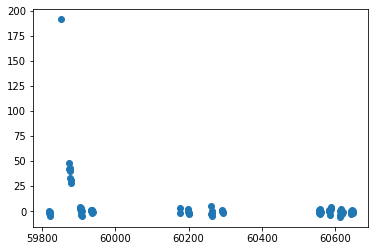

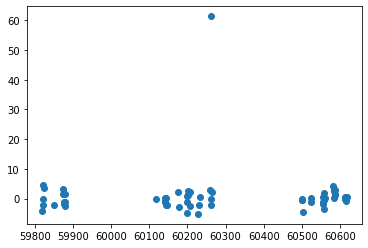

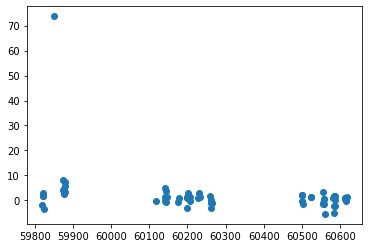

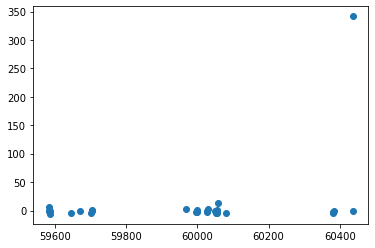

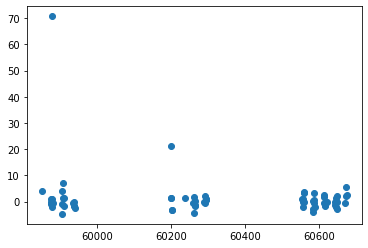

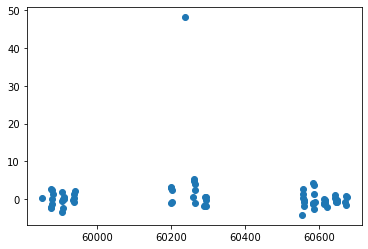

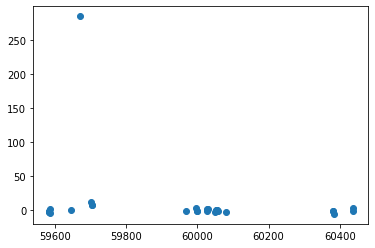

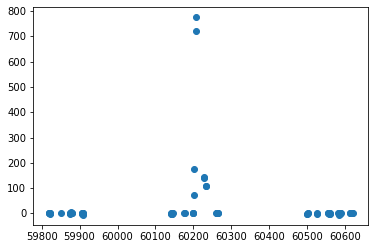

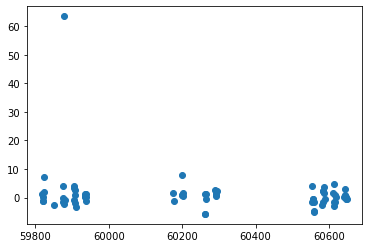

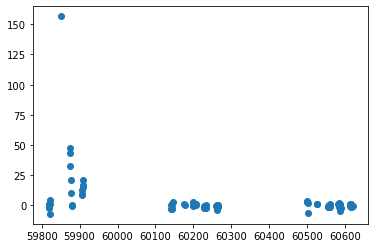

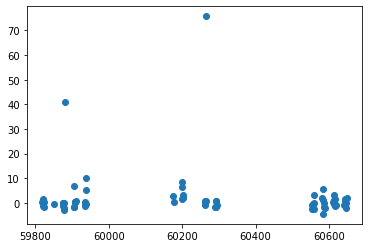

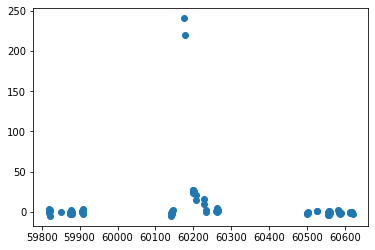

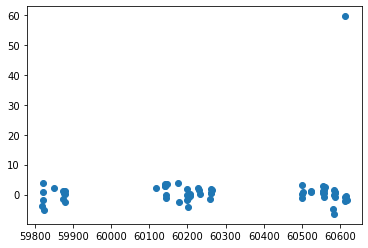

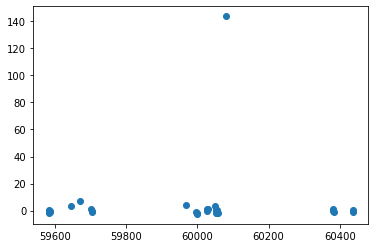

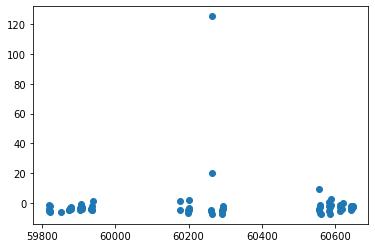

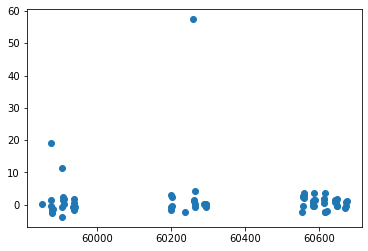

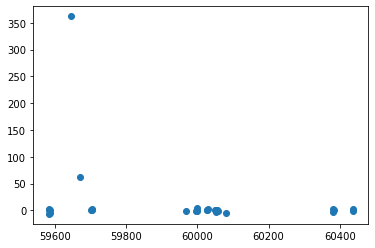

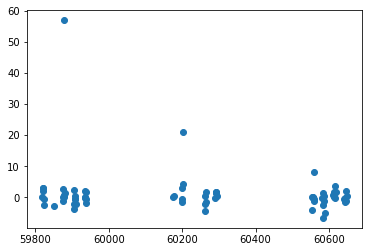

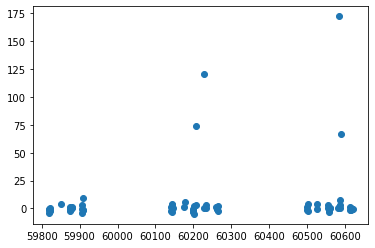

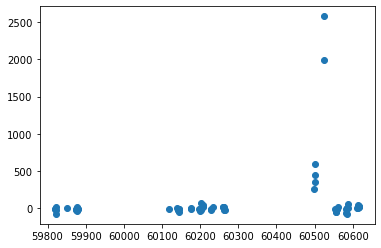

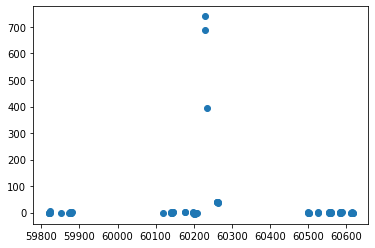

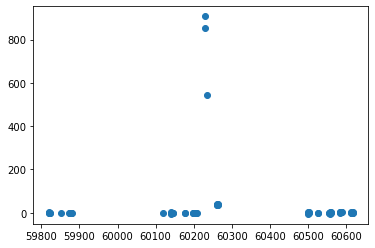

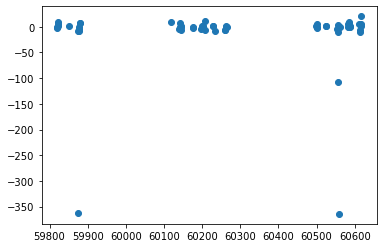

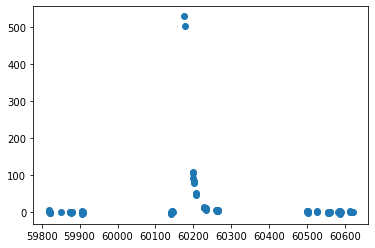

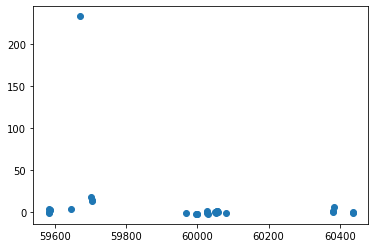

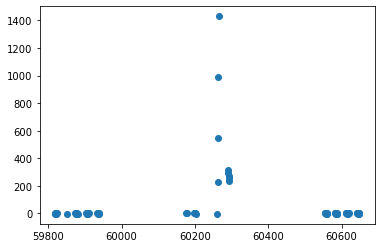

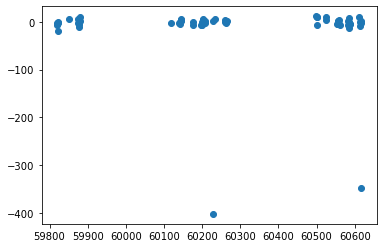

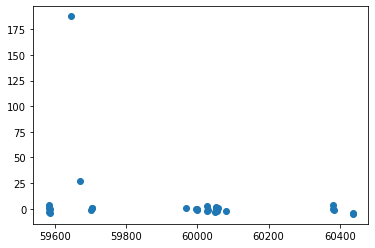

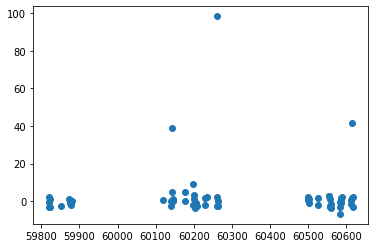

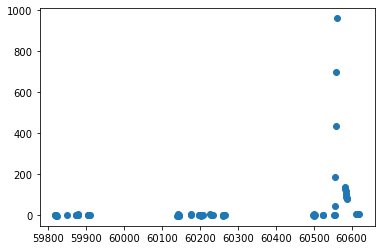

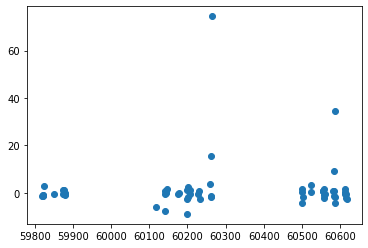

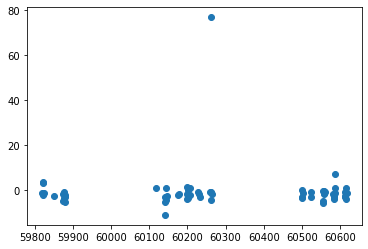

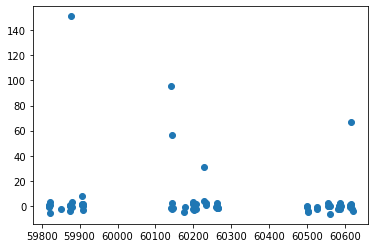

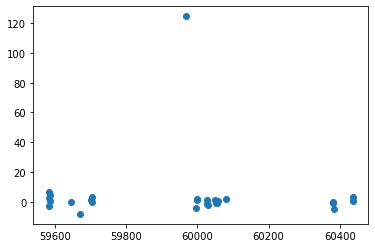

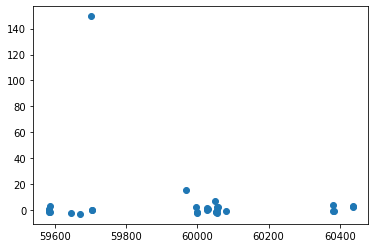

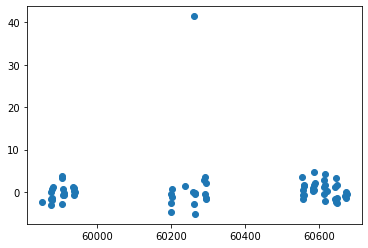

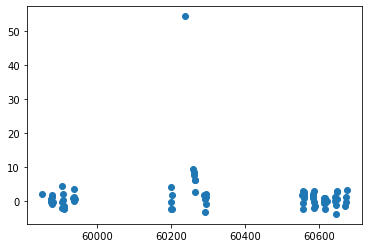

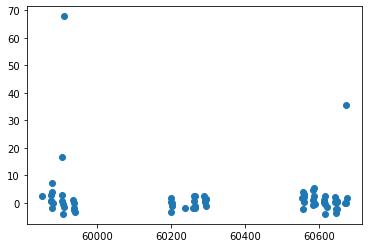

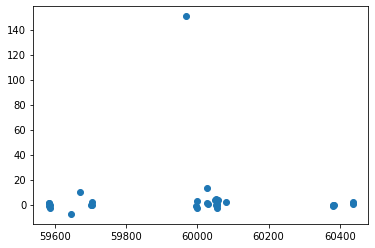

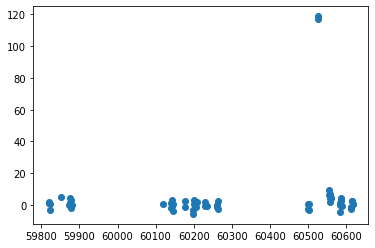

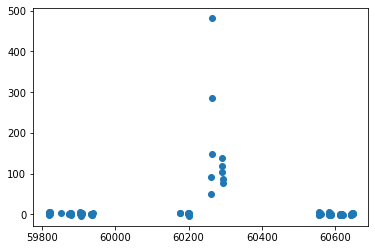

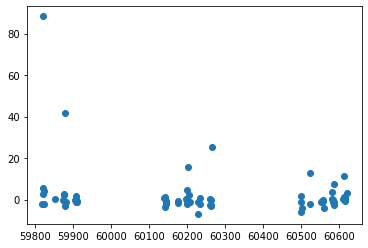

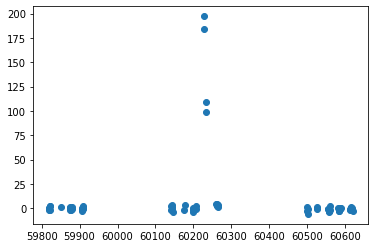

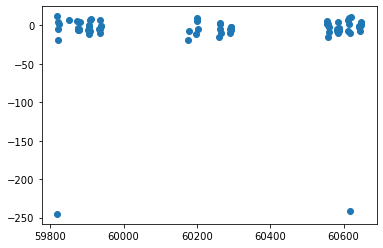

In [19]:
for rank in range(1, 100):

    object_id = rank_to_object_id(-rank, b_score, idx_id_b_dist)

    lc = u_lcs[f"{object_id}"]
    mjd = u_mjds[f"{object_id}"]

    plt.clf()
    plt.scatter(mjd, lc)
    plt.show()
    # print(np.nanmean(lc))
    # print(meta_data.loc[object_id, ["target", "true_target"]])